1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику. Сколько уникальных значений принимает переменная platform?

In [2]:
import pandas as pd

In [3]:
user_data = pd.read_csv('C:/Users/artyr/Desktop/Karpov_ML/user_data.csv')

In [4]:
logs = pd.read_csv('C:/Users/artyr/Desktop/Karpov_ML/logs.csv')

In [5]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [6]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [7]:
logs.platform.nunique()

3

In [8]:
user_data.shape

(2954, 3)

In [9]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [10]:
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [11]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [12]:
logs.shape

(4500, 4)

In [13]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [14]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [15]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


2. Какой клиент совершил больше всего успешных операций? (success == True)

In [42]:
success_number = logs.query('success == True')\
                     .groupby('client', as_index=False) \
                     .aggregate({'success':'count'}) \
                     .rename(columns={'success':'success_number'}) \
                     .sort_values('success_number', ascending=False)

In [43]:
success_number

,client,success_number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [44]:
maximum_success = success_number.success_number.max()

In [50]:
successful_clients = success_number.query('success_number == @maximum_success') \
                                   .sort_values('client') \
                                   .client \
                                   .tolist()

In [51]:
successful_clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

Способ 1

In [52]:
for client in successful_clients:
    print(client, end=', ')

12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584, 

Способ 2

In [53]:
', '.join([str(client) for client in successful_clients])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

Альтернативный способ выполнения задания

In [56]:
success_number_2 = logs \
    .groupby('client', as_index=False) \
    .aggregate({'success':'sum'}) \
    .rename(columns={'success':'success_number'}) \
    .sort_values('success_number', ascending=False)

In [57]:
success_number_2.head()

,client,success_number
3300,82563,41
1426,36165,41
2095,52870,41
468,12179,41
2469,61473,41


In [58]:
maximum_success2 = success_number_2.success_number.max()

In [61]:
successful_clients2 = success_number_2.query('success_number == @maximum_success') \
                                   .sort_values('client') \
                                   .client \
                                   .tolist()

In [63]:
', '.join([str(client) for client in successful_clients2])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

3. С какой платформы осуществляется наибольшее количество успешных операций?

In [70]:
logs.query('success == True') \
    .platform \
    .value_counts() \
    .idxmax()

'phone'

4. Какую платформу предпочитают премиумные клиенты?

In [71]:
data = user_data.merge(logs)

In [72]:
data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [78]:
data.query('premium == True') \
    .platform \
    .value_counts() 

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

In [79]:
import seaborn as sns

D:\Programs\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programs\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

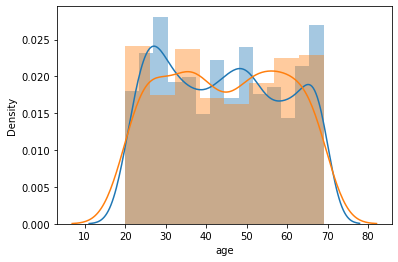

In [82]:
sns.distplot(data.query('premium == False').age)
sns.distplot(data.query('premium == True').age)

In [91]:
import matplotlib.pyplot as plt

D:\Programs\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programs\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

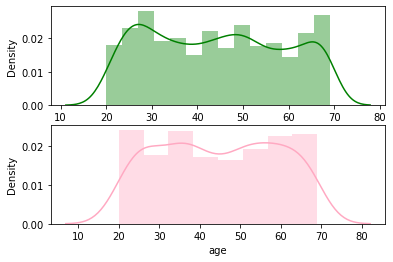

In [100]:
fig, ax = plt.subplots(nrows=2, ncols=1)

sns.distplot(data.query('premium == False').age, ax=ax[0], color='green')
sns.distplot(data.query('premium == True').age, ax=ax[1], color='#FFA9C2')

6. Постройте график распределения числа успешных операций

In [102]:
client_vs_success_number = data.groupby('client') \
    .aggregate({'success':'sum'})

D:\Programs\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

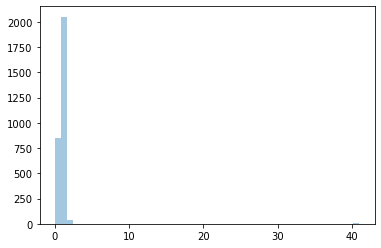

In [106]:
sns.distplot(client_vs_success_number, kde=False)

In [105]:
client_vs_success_number.success.value_counts()

1     2051
0      850
2       42
41       9
3        1
40       1
Name: success, dtype: int64

7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

In [124]:
age_vs_success_number = data.query('platform == "computer"') \
                            .groupby('age', as_index=False) \
                            .aggregate({'success':'sum'})

<AxesSubplot:xlabel='age', ylabel='success'>

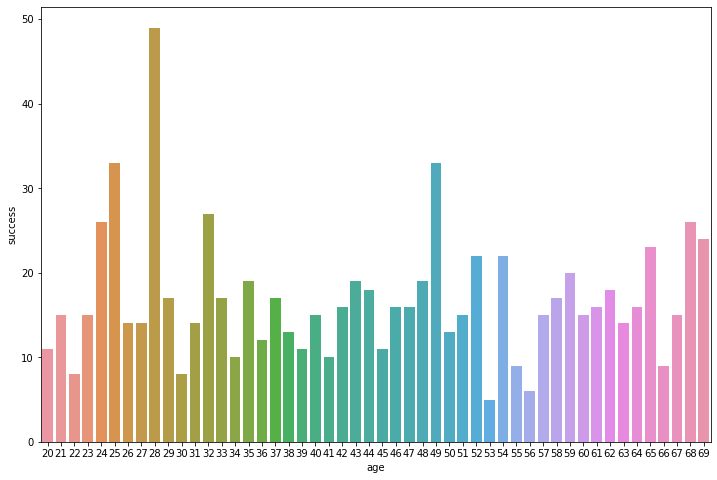

In [125]:
plt.figure(figsize=[12,8])
sns.barplot(x=age_vs_success_number.age, y=age_vs_success_number.success)

Альтернативный вариант

In [127]:
computer_success = data.query('platform == "computer" and success == True')

D:\Programs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

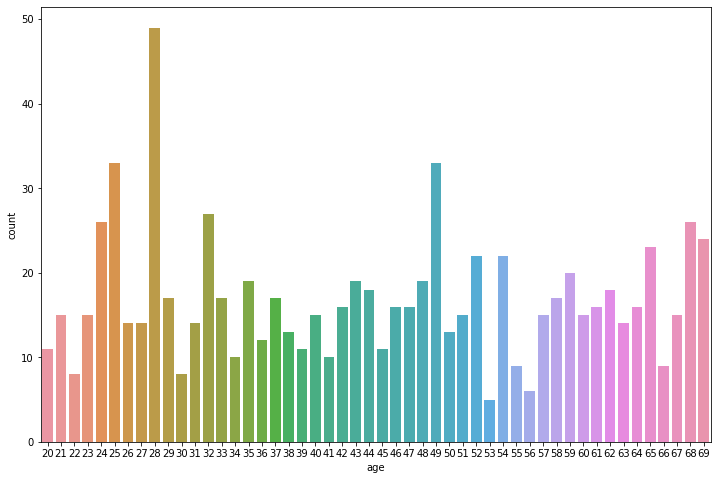

In [129]:
plt.figure(figsize=[12,8])
sns.countplot(computer_success.age)